<a href="https://colab.research.google.com/github/SWeat-python-weekend-study/jisun_So/blob/main/WEEK4_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('PatientInfo.csv')
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
df['counts']=1
df.columns

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state', 'counts'],
      dtype='object')

In [6]:
df.country.unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand', 'Canada',
       'India', 'Switzerland', 'Germany', 'Indonesia', 'Vietnam',
       'Foreign', 'Mongolia', 'United Kingdom', 'Spain', 'Bangladesh'],
      dtype=object)

In [9]:
df.groupby('country').count()[['patient_id']]

,patient_id
country,
Bangladesh,5
Canada,1
China,11
Foreign,7
France,1
Germany,1
India,1
Indonesia,2
Korea,5123


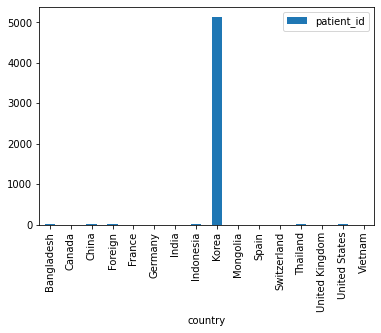

In [10]:
df.groupby('country').count()[['patient_id']].plot(kind='bar')

In [13]:
df.groupby('infection_case'). sum()[['counts']]

,counts
infection_case,
Anyang Gunpo Pastors Group,1
Biblical Language study meeting,3
Bonghwa Pureun Nursing Home,31
Changnyeong Coin Karaoke,4
Cheongdo Daenam Hospital,21
Coupang Logistics Center,80
Daejeon door-to-door sales,1
Daezayeon Korea,3
Day Care Center,43


In [16]:
rf = df.groupby('confirmed_date').sum()
rf

,patient_id,counts
confirmed_date,,
2020-01-20,1400000001,1
2020-01-23,1000000001,1
2020-01-26,2000000001,1
2020-01-27,2000000002,1
2020-01-30,8000000010,4
...,...,...
2020-06-26,66400043188,40
2020-06-27,88300039537,48
2020-06-28,75622054812,38


In [23]:
rf ['dead'] = df.groupby('deceased_date').sum()[['counts']]
rf

,patient_id,counts,dead
confirmed_date,,,
2020-01-20,1400000001,1,NaN
2020-01-23,1000000001,1,NaN
2020-01-26,2000000001,1,NaN
2020-01-27,2000000002,1,NaN
2020-01-30,8000000010,4,NaN
...,...,...,...
2020-06-26,66400043188,40,NaN
2020-06-27,88300039537,48,NaN
2020-06-28,75622054812,38,NaN


In [26]:
rf['total_dead'] = rf['dead'].cumsum()
rf

,patient_id,counts,dead,total_dead
confirmed_date,,,,
2020-01-20,1400000001,1,NaN,NaN
2020-01-23,1000000001,1,NaN,NaN
2020-01-26,2000000001,1,NaN,NaN
2020-01-27,2000000002,1,NaN,NaN
2020-01-30,8000000010,4,NaN,NaN
...,...,...,...,...
2020-06-26,66400043188,40,NaN,NaN
2020-06-27,88300039537,48,NaN,NaN
2020-06-28,75622054812,38,NaN,NaN
